In [2]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from utils import plot_batch, calculate_loss_and_accuracy, classes
from FruitModel import FruitModel

In [3]:
model = FruitModel()
model.load_state_dict(torch.load('models/fruit_light_net.pt')['state_dict'])
model = model.cuda()
model = model.eval()

In [4]:
validation_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
rows, columns = 3, 3

In [6]:
validation_data = ImageFolder('fruits-360/Test', validation_transforms)

In [7]:
validation_loader = DataLoader(validation_data, batch_size=rows*columns, num_workers=0, shuffle=True)

In [8]:
batch, labels = next(iter(validation_loader))

In [9]:
labels_to_text = [classes[x] for x in labels]
_, idx = torch.topk(model(batch.cuda()), 1)
pred_to_text = [classes[x] for x in idx]

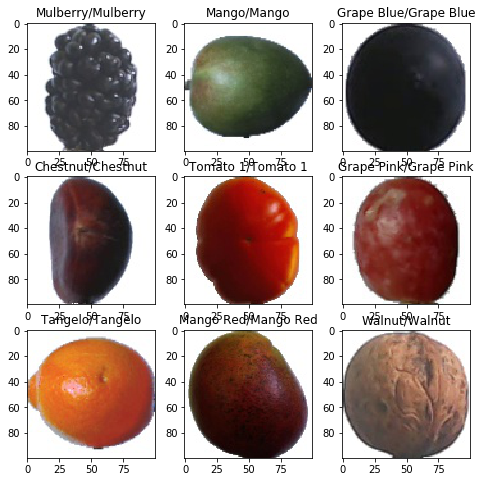

In [10]:
permuted = batch.permute(0, 2, 3, 1)
fig = plt.figure(figsize=(8, 8))
for i in range(1, columns*rows + 1):
    img = permuted[i-1]
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(labels_to_text[i-1])
    plt.imshow(img)

In [33]:
pred_to_text

['Cucumber Ripe 2',
 'Apple Braeburn',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Granny Smith',
 'Cucumber Ripe 2',
 'Physalis',
 'Pear 2',
 'Raspberry']